In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df=pd.read_csv('railway.csv')
df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,No Reason,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,No Railcard,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,No Reason,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,No Railcard,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,No Reason,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,No Railcard,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,No Reason,No


In [54]:
df.shape

(31653, 19)

In [4]:
md=pd.read_csv('railway_data_dictionary.csv')
md.shape

(18, 2)

In [56]:
md

,Field,Description
0,Transaction ID,Unique identifier for an individual train tick...
1,Date of Purchase,Date the ticket was purchased
2,Time of Purchase,Time the ticket was purchased
3,Purchase Type,Whether the ticket was purchased online or dir...
4,Payment Method,Payment method used to purchase the ticket (Co...
5,Railcard,Whether the passenger is a National Railcard h...
6,Ticket Class,Seat class for the ticket (Standard or First)
7,Ticket Type,When you bought or can use the ticket. Advance...
8,Price,Final cost of the ticket
9,Departure Station,Station to board the train


In [29]:
for col in range(md.shape[1]):
    for row in range(md.shape[0]):
        print(md.iloc[row,col])

Transaction ID
Date of Purchase
Time of Purchase
Purchase Type
Payment Method
Railcard
Ticket Class
Ticket Type
Price
Departure Station
Arrival Destination
Date of Journey
Departure Time
Arrival Time
Actual Arrival Time
Journey Status
Reason for Delay
Refund Request
Unique identifier for an individual train ticket purchase
Date the ticket was purchased
Time the ticket was purchased
Whether the ticket was purchased online or directly at a train station
Payment method used to purchase the ticket (Contactles, Credit Card, or Debit Card)
Whether the passenger is a National Railcard holder (Adult, Senior, or Disabled) or not (None). Railcard holders get 1/3 off their ticket purchases.
Seat class for the ticket (Standard or First)
When you bought or can use the ticket. Advance tickets are 1/2 off and must be purchased at least a day prior to departure. Off-Peak tickets are 1/4 off and must be used outside of peak hours (weekdays between 6-8am and 4-6pm). Anytime tickets are full price and ca

In [44]:
df['Journey Status'].unique()

array(['On Time', 'Delayed', 'Cancelled'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             10735 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

In [51]:
df.isna().sum()

Transaction ID         0
Date of Purchase       0
Time of Purchase       0
Purchase Type          0
Payment Method         0
Railcard               0
Ticket Class           0
Ticket Type            0
Price                  0
Departure Station      0
Arrival Destination    0
Date of Journey        0
Departure Time         0
Arrival Time           0
Actual Arrival Time    0
Journey Status         0
Reason for Delay       0
Refund Request         0
dtype: int64

In [37]:
df[df['Journey Status']=='Delayed'].isna().sum()

Transaction ID         0
Date of Purchase       0
Time of Purchase       0
Purchase Type          0
Payment Method         0
Railcard               0
Ticket Class           0
Ticket Type            0
Price                  0
Departure Station      0
Arrival Destination    0
Date of Journey        0
Departure Time         0
Arrival Time           0
Actual Arrival Time    0
Journey Status         0
Reason for Delay       0
Refund Request         0
dtype: int64

In [32]:
df['Reason for Delay']=df['Reason for Delay'].fillna("No Reason")

In [35]:
df['Railcard']=df['Railcard'].fillna("No Railcard")

In [69]:
df=df.drop('Original Price',axis=1)

In [70]:
df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,No Reason,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,No Railcard,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,No Reason,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,No Railcard,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,No Reason,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,No Railcard,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,No Reason,No


In [50]:
df[df['Journey Status']=="Cancelled"].isna().sum()

Transaction ID         0
Date of Purchase       0
Time of Purchase       0
Purchase Type          0
Payment Method         0
Railcard               0
Ticket Class           0
Ticket Type            0
Price                  0
Departure Station      0
Arrival Destination    0
Date of Journey        0
Departure Time         0
Arrival Time           0
Actual Arrival Time    0
Journey Status         0
Reason for Delay       0
Refund Request         0
dtype: int64

In [49]:
df['Actual Arrival Time']=df['Actual Arrival Time'].fillna("didn't Arrive")

In [72]:
def calculate_original_price(row):
    if row["Ticket Type"] == "Advance":
        discount_factor = 0.5
    elif row["Ticket Type"] == "Off-Peak":
        discount_factor = 0.75
    else:
        discount_factor = 1
    if row["Railcard"]!='No Railcard':
        original_price = row["Price"] / (discount_factor * 0.67)
    else:
        original_price = row["Price"] / discount_factor
    return round(original_price, 2)
df["Original Price"] = df.apply(calculate_original_price, axis=1)

In [73]:
df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request,Original Price
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,No Reason,No,128.36
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No,68.66
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,No Railcard,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,No Reason,No,6.00
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,No Railcard,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,No Reason,No,26.00
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,No Railcard,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,No Reason,No,152.00


In [79]:
df.describe()

,Price,Original Price
count,31653.000000,31653.000000
mean,23.439200,39.510322
std,29.997628,45.476063
min,1.000000,2.000000
25%,5.000000,11.000000
50%,11.000000,17.910000
75%,35.000000,66.670000
max,267.000000,270.670000


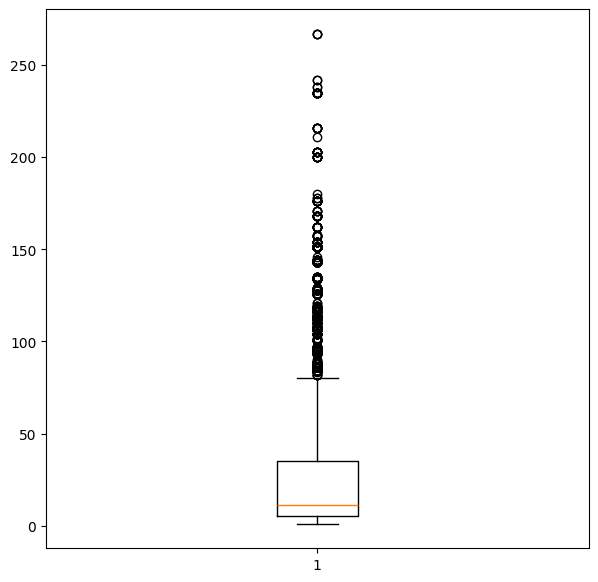

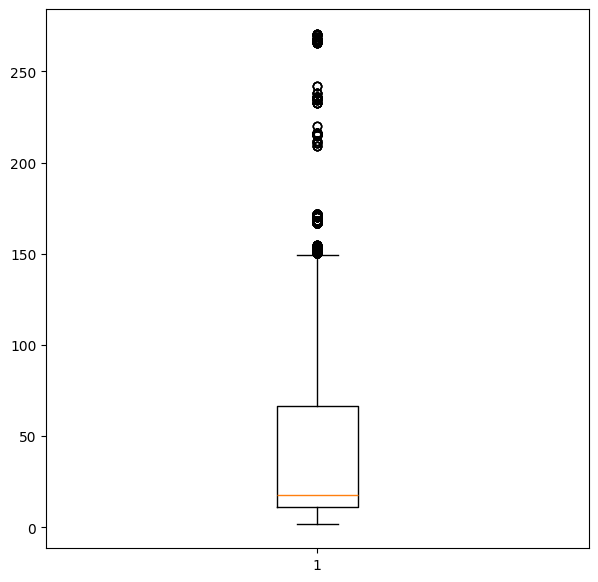

In [85]:
for col in df.select_dtypes(include=['number']):
    plt.figure(figsize=(7,7))
    plt.boxplot(data=df,x=col)
    plt.show()

<Axes: >

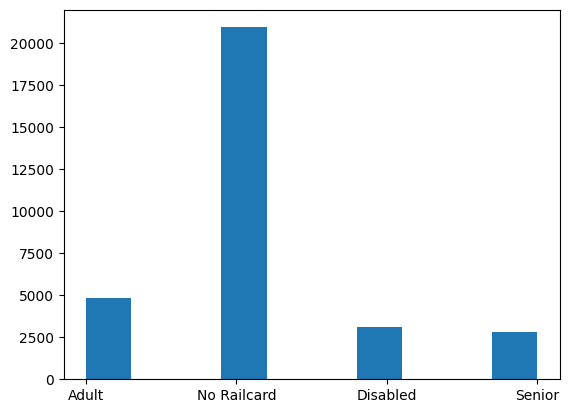

In [90]:
df['Railcard'].hist(grid=False)

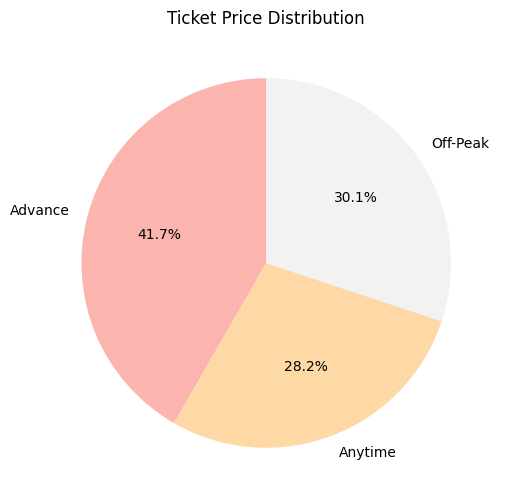

In [95]:
plt.figure(figsize=(6, 6))
df.groupby("Ticket Type")["Price"].sum().plot(kind="pie", autopct="%1.1f%%", startangle=90, colormap="Pastel1")
plt.ylabel("")
plt.title("Ticket Price Distribution")
plt.show()

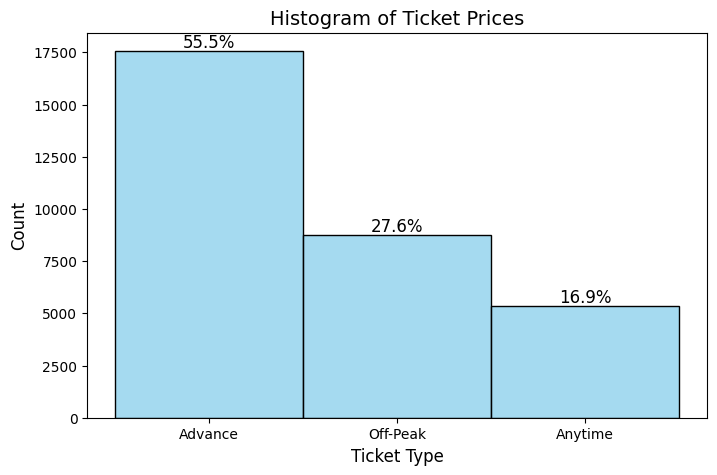

In [103]:
plt.figure(figsize=(8, 5))
ax = sns.histplot(df["Ticket Type"], bins=5, kde=False, color="skyblue")
total = len(df["Ticket Type"])
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        percentage = f"{(height / total) * 100:.1f}%"
        plt.text(patch.get_x() + patch.get_width() / 2, height, percentage, 
                 ha="center", va="bottom", fontsize=12, color="black")
plt.xlabel("Ticket Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Histogram of Ticket Prices", fontsize=14)
plt.show()

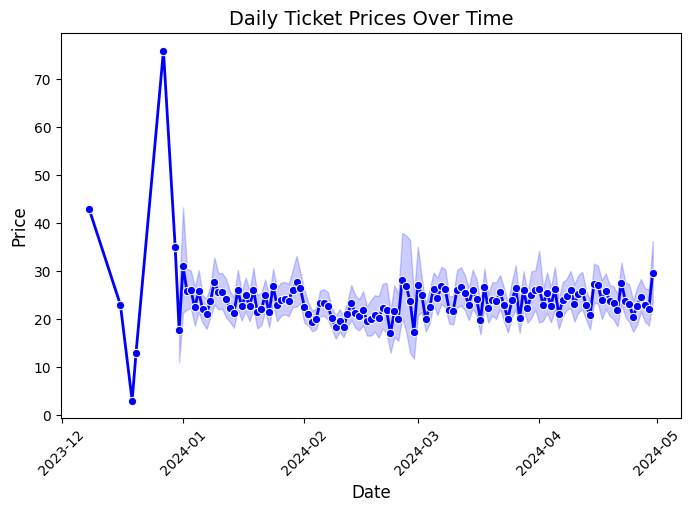

In [104]:
df["Date of Purchase"] = pd.to_datetime(df["Date of Purchase"])
plt.figure(figsize=(8, 5))
sns.lineplot(x=df["Date of Purchase"], y=df["Price"], marker="o", color="b", linewidth=2)
plt.xticks(rotation=45) 
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.title("Daily Ticket Prices Over Time", fontsize=14)
plt.show()

D:\users\moaz\python\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


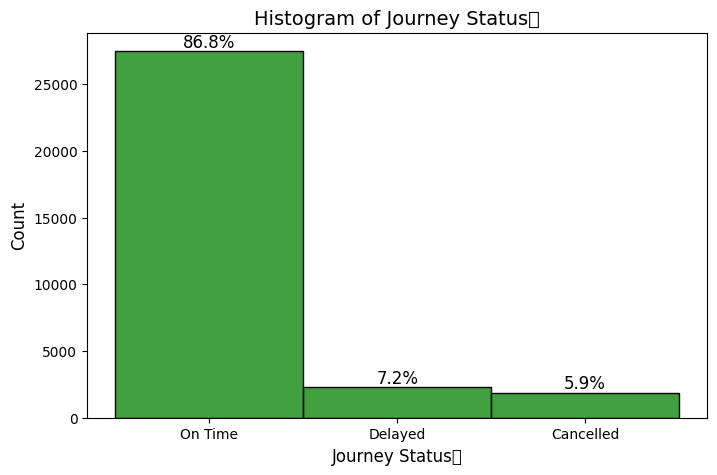

In [107]:
plt.figure(figsize=(8, 5))
ax = sns.histplot(df["Journey Status"], bins=5, kde=False, color="green")
total = len(df["Journey Status"])
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        percentage = f"{(height / total) * 100:.1f}%"
        plt.text(patch.get_x() + patch.get_width() / 2, height, percentage, 
                 ha="center", va="bottom", fontsize=12, color="black")

plt.xlabel("Journey Status	", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Histogram of Journey Status	", fontsize=14)
plt.show()

In [92]:
df['Ticket Class'].value_counts()

Ticket Class
Standard       28595
First Class     3058
Name: count, dtype: int64

In [93]:
df['Purchase Type'].value_counts()

Purchase Type
Online     18521
Station    13132
Name: count, dtype: int64

In [102]:
df['Journey Status'].value_counts()

Journey Status
On Time      27481
Delayed       2292
Cancelled     1880
Name: count, dtype: int64

In [75]:
df.columns

Index(['Transaction ID', 'Date of Purchase', 'Time of Purchase',
       'Purchase Type', 'Payment Method', 'Railcard', 'Ticket Class',
       'Ticket Type', 'Price', 'Departure Station', 'Arrival Destination',
       'Date of Journey', 'Departure Time', 'Arrival Time',
       'Actual Arrival Time', 'Journey Status', 'Reason for Delay',
       'Refund Request', 'Original Price'],
      dtype='object')

In [76]:
final_df=df[['Transaction ID', 'Date of Purchase', 'Time of Purchase',
       'Purchase Type', 'Payment Method', 'Railcard', 'Ticket Class',
       'Ticket Type', 'Original Price', 'Price', 'Departure Station', 'Arrival Destination',
       'Date of Journey', 'Departure Time', 'Arrival Time',
       'Actual Arrival Time', 'Journey Status', 'Reason for Delay',
       'Refund Request']]

In [77]:
final_df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Original Price,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,128.36,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,No Reason,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,68.66,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,No Railcard,Standard,Advance,6.00,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,No Reason,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,No Railcard,Standard,Advance,26.00,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,No Reason,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,No Railcard,Standard,Advance,152.00,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,No Reason,No


In [1]:
final_df.to_csv("final_railway_dataset.csv", index=False)

NameError: name 'final_df' is not defined